In [1]:
import numpy as np
import pyaudio
import matplotlib.pyplot as plt

In [2]:
gauss = lambda x: np.exp(4-(4/(4*x*(1-x))))

K = np.zeros(200)
for i in range(100):
    if i == 0:
        continue
    val = gauss(i/100)
    K[i] = val
    K[i+100] = val

growth = lambda x: 2 * np.exp(((x - 0.33)**2)/-0.01) - 1

def step(A):
    conv = np.convolve(A, K, mode="same")
    g = np.array([growth(c) for c in conv])
    return np.clip(A + (0.1*g), 0, 1)


In [3]:
samples = (np.sin(2 * np.pi * np.arange(1024) * 40 / 44100)).astype(np.float32)
# norm = np.linalg.norm(samples)
# samples = samples / norm
# samples = np.random.rand(1024)

def callback(in_data, frame_count, time_info, status):
    global samples
    
    # data = step(samples)
    # samples = data
    # norm = np.linalg.norm(samples)
    # data = (2 * data / norm) -  1
    # return (data, pyaudio.paContinue)
    return (samples, pyaudio.paContinue)

p = pyaudio.PyAudio()

# Open stream using callback (3)
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=44100,
                output=True,
                stream_callback=callback)

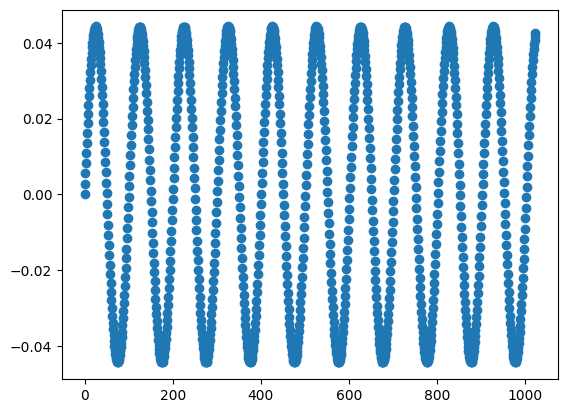

In [5]:

plt.scatter(range(1024), samples)
